In [16]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'a08ff5b7-7256-488c-8d74-2b100b64719c'
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2025-10-06T19:56:31.548Z', 'error_code': 0, 'error_message': None, 'elapsed': 43, 'credit_count': 1, 'notice': None, 'total_count': 9490}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 12411, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [17]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [18]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12411,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.992956e+07,1.992956e+07,False,NaN,1,NaN,NaN,None,2025-10-06T19:54:00.000Z,125388.599254,6.988374e+10,-2.1063,-0.477737,2.277133,9.655085,13.951394,6.811708,15.265427,2.498940e+12,58.1586,2.633161e+12,None,2025-10-06T19:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-06 12:56:44.964652
1,1027,Ethereum,ETH,ethereum,10863,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.207033e+08,1.207033e+08,True,NaN,2,NaN,NaN,None,2025-10-06T19:55:00.000Z,4703.706104,4.329865e+10,2.3079,-0.145925,4.719209,12.278073,10.569193,21.947447,80.417001,5.677526e+11,13.2126,5.677526e+11,None,2025-10-06T19:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-06 12:56:44.964652
2,52,XRP,XRP,xrp,1716,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.987170e+10,9.998579e+10,False,NaN,3,NaN,NaN,None,2025-10-06T19:54:00.000Z,3.027721,6.065262e+09,15.9794,-0.440356,2.478489,4.530399,8.339815,-1.760822,30.772645,1.812748e+11,4.2186,3.027721e+11,None,2025-10-06T19:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-06 12:56:44.964652
3,825,Tether USDt,USDT,tether,150911,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.770242e+11,1.810267e+11,True,NaN,4,NaN,NaN,None,2025-10-06T19:54:00.000Z,1.000221,1.614071e+11,4.4805,-0.036773,0.002679,-0.026857,0.004814,-0.026390,0.005829,1.770633e+11,4.1206,1.810667e+11,None,2025-10-06T19:54:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-10-06 12:56:44.964652
4,1839,BNB,BNB,bnb,2786,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.391846e+08,1.391846e+08,False,NaN,5,NaN,NaN,None,2025-10-06T19:55:00.000Z,1226.061394,5.483686e+09,51.4316,0.508456,6.555384,20.162340,42.886023,57.281172,85.546773,1.706488e+11,3.9713,1.706488e+11,None,2025-10-06T19:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-06 12:56:44.964652
5,5426,Solana,SOL,solana,1014,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.454813e+08,6.113054e+08,True,NaN,6,5.252369e+08,1.235562e+11,None,2025-10-06T19:55:00.000Z,235.239026,7.112484e+09,3.6097,-0.444167,3.506772,10.686635,17.829218,37.335392,55.243966,1.283185e+11,2.9862,1.438029e+11,None,2025-10-06T19:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-06 12:56:44.964652
6,3408,USDC,USDC,usd-coin,32556,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,7.542648e+10,7.542648e+10,False,NaN,7,6.090122e+10,6.088020e+10,None,2025-10-06T19:54:00.000Z,0.999655,1.928557e+10,24.1062,-0.027134,-0.010062,-0.018609,-0.019458,-0.041971,-0.030823,7.540044e+10,1.7547,7.540044e+10,None,2025-10-06T19:54:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-10-06 12:56:44.964652
7,74,Dogecoin,DOGE,dogecoin,1317,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.512417e+11,1.512417e+11,True,NaN,8,NaN,NaN,None,2025-10-06T19:54:00.000Z,0.267823,3.732149e+09,12.9328,-0.754654,6.370010,14.149229,25.999317,23.511001,57.226775,4.050602e+10,0.9426,4.050602e+10,None,2025-10-06T19:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-06 12:56:44.964652
8,1958,TRON,TRX,tron,1238,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, l

In [19]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'a08ff5b7-7256-488c-8d74-2b100b64719c'
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df2 = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df_append = pd.DataFrame(df2)
    df = pd.concat([df2, df_append])

In [20]:
import os
from time import time
from time import sleep

for i in range(250):
    api_runner()
    print('API Runner ran successfully.')
    sleep(60) # Sleep for 1 min
exit()

{'status': {'timestamp': '2025-10-06T19:56:59.566Z', 'error_code': 0, 'error_message': None, 'elapsed': 13, 'credit_count': 1, 'notice': None, 'total_count': 9490}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 12411, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

KeyboardInterrupt: 

In [24]:
# Revert scientific notation

pd.set_option('display.float_format', lambda x: '%.5f' % x)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,12411,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19929565.00000,19929565.00000,False,NaN,1,NaN,NaN,None,2025-10-06T20:00:00.000Z,125457.59671,70048505089.39806,-0.87730,-0.48515,2.33144,9.76099,13.98709,6.74259,15.33399,2500315328281.32178,58.18720,2634609530810.52002,None,2025-10-06T20:00:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,10863,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120703250.52855,120703250.52855,True,NaN,2,NaN,NaN,None,2025-10-06T20:00:00.000Z,4725.03753,42344994643.69576,-0.28420,0.20375,5.28787,12.70466,11.02330,22.08102,81.02577,570327389030.45496,13.27310,570327389030.44995,None,2025-10-06T20:00:00.000Z,NaN,NaN,NaN,NaN,NaN
2,52,XRP,XRP,xrp,1716,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,59871700035.00000,99985791876.00000,False,NaN,3,NaN,NaN,None,2025-10-06T20:00:00.000Z,3.02647,6069874774.74213,15.80430,-0.60626,2.47297,4.43073,8.28675,-2.39207,30.47841,181199856352.84335,4.21700,302646920409.66998,None,2025-10-06T20:00:00.000Z,NaN,NaN,NaN,NaN,NaN
3,825,Tether USDt,USDT,tether,150911,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,177024150116.51306,181026669415.05026,True,NaN,4,NaN,NaN,None,2025-10-06T20:00:00.000Z,1.00043,161630017161.03308,4.44470,-0.00533,0.02861,-0.02046,0.03399,0.00749,0.02952,177099435499.03683,4.12160,181103657001.45999,None,2025-10-06T20:00:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
4,1839,BNB,BNB,bnb,2786,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,139184562.55000,139184562.55000,False,NaN,5,NaN,NaN,None,2025-10-06T20:01:00.000Z,1225.56670,5481531445.93388,51.31220,0.43927,6.57900,20.07455,42.86503,56.97541,85.43601,170579964692.75446,3.96990,170579964692.75000,None,2025-10-06T20:01:00.000Z,NaN,NaN,NaN,NaN,NaN
5,5426,Solana,SOL,solana,1014,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,545481343.79234,611305445.24706,True,NaN,6,525236893.30000,123605981309.31526,None,2025-10-06T20:00:00.000Z,235.33378,7124036923.86850,3.66330,-0.60086,3.68061,10.47022,17.80851,36.87400,55.18846,128370184283.42712,2.98750,143860818619.85999,None,2025-10-06T20:00:00.000Z,NaN,NaN,NaN,NaN,NaN
6,3408,USDC,USDC,usd-coin,32556,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,75426479611.92395,75426479611.92395,False,NaN,7,60901219650.23000,60884000769.84055,None,2025-10-06T20:00:00.000Z,0.99972,19191473145.20580,23.36390,-0.00328,-0.00409,-0.02788,-0.01040,-0.01451,-0.02224,75405153938.34804,1.75490,75405153938.35001,None,2025-10-06T20:00:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
7,74,Dogecoin,DOGE,dogecoin,1317,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,151241746383.70523,151241746383.70523,True,NaN,8,NaN,NaN,None,2025-10-06T20:00:00.000Z,0.26831,3735771060.33624,12.68150,-0.50517,6.58799,14.28278,26.10519,23.42337,57.27791,40579802450.73160,0.94440,40579802450.73000,None,2025-10-06T20:00:00.000Z,NaN,NaN,NaN,NaN,NaN
8,1958,TRON,TRX,tron,1238,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,94668702387.979

In [26]:
# Coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.48515,2.33144,9.76099,13.98709,6.74259,15.33399
Ethereum,0.20375,5.28787,12.70466,11.02330,22.08102,81.02577
XRP,-0.60626,2.47297,4.43073,8.28675,-2.39207,30.47841
Tether USDt,-0.00533,0.02861,-0.02046,0.03399,0.00749,0.02952
BNB,0.43927,6.57900,20.07455,42.86503,56.97541,85.43601
Solana,-0.60086,3.68061,10.47022,17.80851,36.87400,55.18846
USDC,-0.00328,-0.00409,-0.02788,-0.01040,-0.01451,-0.02224
Dogecoin,-0.50517,6.58799,14.28278,26.10519,23.42337,57.27791
TRON,-0.07029,1.57317,2.94987,6.10353,1.64537,20.51080


In [28]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h    -0.48515
             quote.USD.percent_change_24h    2.33144
             quote.USD.percent_change_7d     9.76099
             quote.USD.percent_change_30d   13.98709
             quote.USD.percent_change_60d    6.74259
             quote.USD.percent_change_90d   15.33399
Ethereum     quote.USD.percent_change_1h     0.20375
             quote.USD.percent_change_24h    5.28787
             quote.USD.percent_change_7d    12.70466
             quote.USD.percent_change_30d   11.02330
             quote.USD.percent_change_60d   22.08102
             quote.USD.percent_change_90d   81.02577
XRP          quote.USD.percent_change_1h    -0.60626
             quote.USD.percent_change_24h    2.47297
             quote.USD.percent_change_7d     4.43073
             quote.USD.percent_change_30d    8.28675
             quote.USD.percent_change_60d   -2.39207
             quote.USD.percent_change_90d   30.47841
Teth

In [29]:
df5 = df4.to_frame(name='values')
df5

values
name                                             
Bitcoin     quote.USD.percent_change_1h  -0.48515
            quote.USD.percent_change_24h  2.33144
            quote.USD.percent_change_7d   9.76099
            quote.USD.percent_change_30d 13.98709
            quote.USD.percent_change_60d  6.74259
            quote.USD.percent_change_90d 15.33399
Ethereum    quote.USD.percent_change_1h   0.20375
            quote.USD.percent_change_24h  5.28787
            quote.USD.percent_change_7d  12.70466
            quote.USD.percent_change_30d 11.02330
            quote.USD.percent_change_60d 22.08102
            quote.USD.percent_change_90d 81.02577
XRP         quote.USD.percent_change_1h  -0.60626
            quote.USD.percent_change_24h  2.47297
            quote.USD.percent_change_7d   4.43073
            quote.USD.percent_change_30d  8.28675
            quote.USD.percent_change_60d -2.39207
            quote.USD.percent_change_90d 30.47841
Tether USDt quote.USD.percent_change_1h  -0.00533
            quote.USD.percent_change_24h  0.02861
            quote.USD.percent_change_7d  -0.02046
            quote.USD.percent_change_30d  0.03399
            quote.USD.percent_change_60d  0.00749
            quote.USD.percent_change_90d  0.02952
BNB         quote.USD.percent_change_1h   0.43927
            quote.USD.percent_change_24h  6.57900
            quote.USD.percent_change_7d  20.07455
            quote.USD.percent_change_30d 42.86503
            quote.USD.percent_change_60d 56.97541
            quote.USD.percent_change_90d 85.43601
Solana      quote.USD.percent_change_1h  -0.60086
            quote.USD.percent_change_24h  3.68061
            quote.USD.percent_change_7d  10.47022
            quote.USD.percent_change_30d 17.80851
            quote.USD.percent_change_60d 36.87400
            quote.USD.percent_change_90d 55.18846
USDC        quote.USD.percent_change_1h  -0.00328
            quote.USD.percent_change_24h -0.00409
            quote.USD.percent_change_7d  -0.02788
            quote.USD.percent_change_30d -0.01040
            quote.USD.percent_change_60d -0.01451
            quote.USD.percent_change_90d -0.02224
Dogecoin    quote.USD.percent_change_1h  -0.50517
            quote.USD.percent_change_24h  6.58799
            quote.USD.percent_change_7d  14.28278
            quote.USD.percent_change_30d 26.10519
            quote.USD.percent_change_60d 23.42337
            quote.USD.percent_change_90d 57.27791
TRON        quote.USD.percent_change_1h  -0.07029
            quote.USD.percent_change_24h  1.57317
            quote.USD.percent_change_7d   2.94987
            quote.USD.percent_change_30d  6.10353
            quote.USD.percent_change_60d  1.64537
            quote.USD.percent_change_90d 20.51080
Cardano     quote.USD.percent_change_1h  -0.25386
            quote.USD.percent_change_24h  5.63901
            quote.USD.percent_change_7d   8.98527
            quote.USD.percent_change_30d  7.54322
            quote.USD.percent_change_60d 14.60626
            quote.USD.percent_change_90d 48.94795
Hyperliquid quote.USD.percent_change_1h  -0.18572
            quote.USD.percent_change_24h  3.68611
            quote.USD.percent_change_7d   7.06011
            quote.USD.percent_change_30d  8.00063
            quote.USD.percent_change_60d 23.60388
            quote.USD.percent_change_90d 26.50446
Chainlink   quote.USD.percent_change_1h   0.13816
            quote.USD.percent_change_24h  6.86787
            quote.USD.percent_change_7d   7.95933
            quote.USD.percent_change_30d  7.10348
            quote.USD.percent_change_60d 28.16397
            quote.USD.percent_change_90d 68.56822
Ethena USDe quote.USD.percent_change_1h   0.00859
            quote.USD.percent_change_24h  0.03265
            quote.USD.percent_change_7d  -0.10429
            quote.USD.percent_change_30d -0.08778
            quote.USD.percent_change_60d -0.08537
            quote.USD.percent_change_90d -0.02529
Sui         quote.USD.percent_change_1h  -0

In [32]:
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.48515
1,Bitcoin,quote.USD.percent_change_24h,2.33144
2,Bitcoin,quote.USD.percent_change_7d,9.76099
3,Bitcoin,quote.USD.percent_change_30d,13.98709
4,Bitcoin,quote.USD.percent_change_60d,6.74259
5,Bitcoin,quote.USD.percent_change_90d,15.33399
6,Ethereum,quote.USD.percent_change_1h,0.20375
7,Ethereum,quote.USD.percent_change_24h,5.28787
8,Ethereum,quote.USD.percent_change_7d,12.70466
9,Ethereum,quote.USD.percent_change_30d,11.02330


In [33]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.48515
1,Bitcoin,quote.USD.percent_change_24h,2.33144
2,Bitcoin,quote.USD.percent_change_7d,9.76099
3,Bitcoin,quote.USD.percent_change_30d,13.98709
4,Bitcoin,quote.USD.percent_change_60d,6.74259
5,Bitcoin,quote.USD.percent_change_90d,15.33399
6,Ethereum,quote.USD.percent_change_1h,0.20375
7,Ethereum,quote.USD.percent_change_24h,5.28787
8,Ethereum,quote.USD.percent_change_7d,12.70466
9,Ethereum,quote.USD.percent_change_30d,11.02330


In [39]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.48515
1,Bitcoin,24h,2.33144
2,Bitcoin,7d,9.76099
3,Bitcoin,30d,13.98709
4,Bitcoin,60d,6.74259
5,Bitcoin,90d,15.33399
6,Ethereum,1h,0.20375
7,Ethereum,24h,5.28787
8,Ethereum,7d,12.70466
9,Ethereum,30d,11.02330


In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

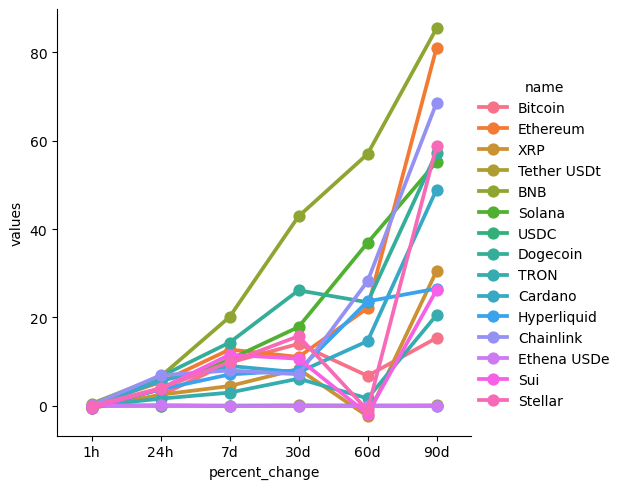

In [41]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [46]:
df8 = df[['name', 'quote.USD.price']]
df8 = df8.query("name == 'XRP'")
df8

,name,quote.USD.price
2,XRP,3.02647
2,XRP,3.02647
